# Interesting Experiments

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

SAMPLE_SIZE = 100
ARRIVAL_RATE = 1
EXECUTION_RATE = 50

## An example arrival time distribution

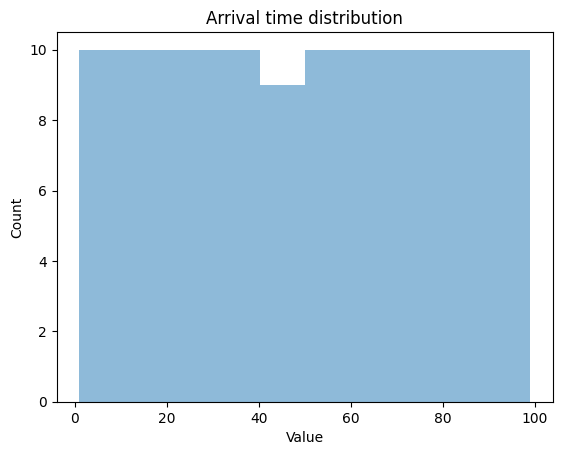

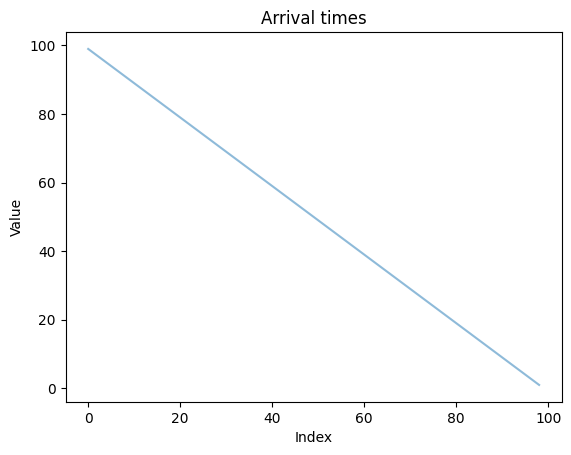

Mean arrival time: 50.0


In [2]:
inter_arrival_time = np.array([100-x for x in range(1, 100)])

plt.title("Arrival time distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(inter_arrival_time, alpha=0.5)
plt.show()

plt.title("Arrival times")
plt.xlabel("Index")
plt.ylabel("Value")
plt.plot(inter_arrival_time, alpha=0.5)
plt.show()

print(f'Mean arrival time: {inter_arrival_time.mean()}')

## Queue length over time

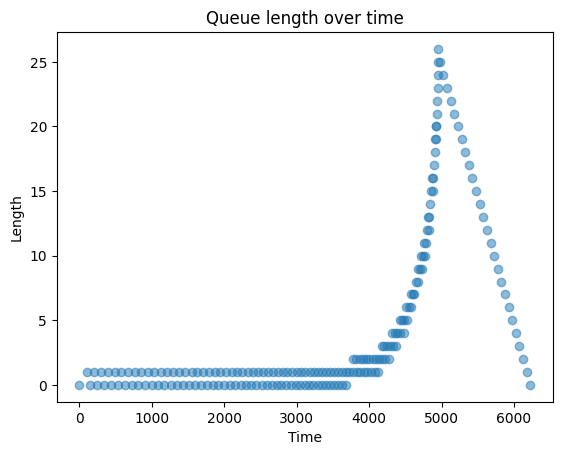

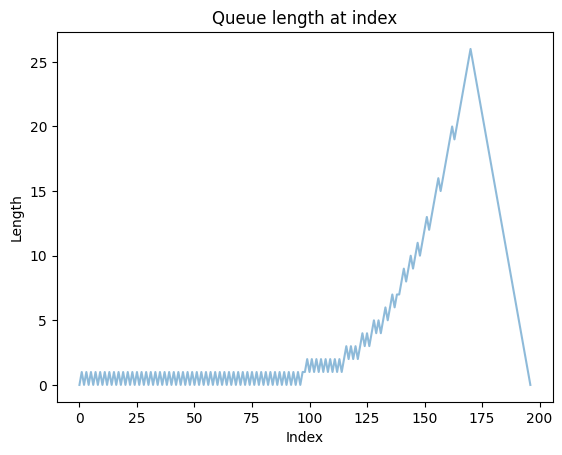

Mean queue length: 4.969543147208122


In [3]:
from src.queue import Queue

queue = Queue(inter_arrival_time, np.full(shape=SAMPLE_SIZE, dtype=int, fill_value=EXECUTION_RATE))
queue.process()

plt.title("Queue length over time")
plt.xlabel("Time")
plt.ylabel("Length")
plt.scatter(*zip(*queue.length_with_timestamps), alpha=0.5)
plt.show()

plt.title("Queue length at index")
plt.xlabel("Index")
plt.ylabel("Length")
plt.plot(queue.length, alpha=0.5)
plt.show()

print(f'Mean queue length: {queue.length.mean()}')


## Departure time and distribution

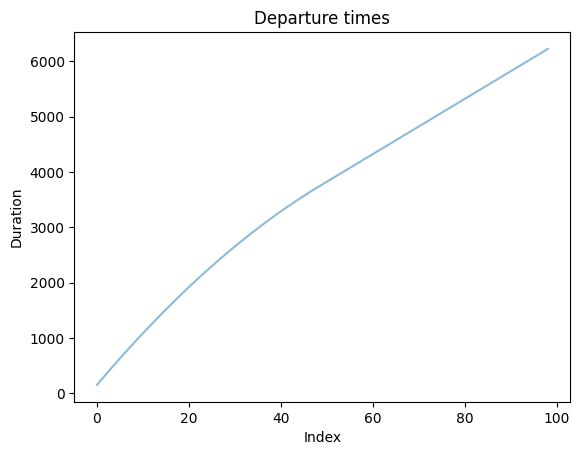

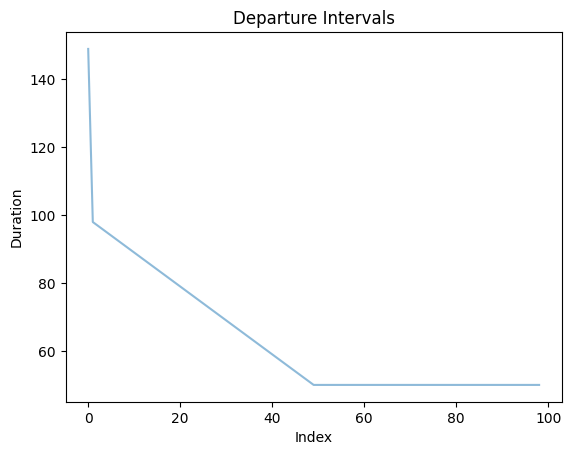

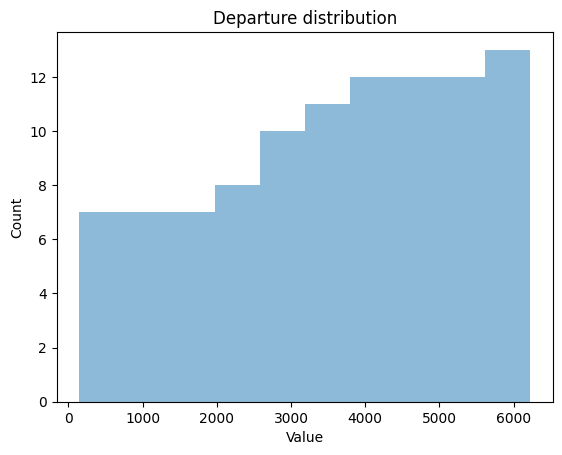

In [4]:
from src.queue import timestamps_to_intervals

plt.title("Departure times")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(queue.departure_times, alpha=0.5)
plt.show()

plt.title("Departure Intervals")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(timestamps_to_intervals(queue.departure_times), alpha=0.5)
plt.show()

plt.title("Departure distribution")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.departure_times, alpha=0.5)
plt.show()

## Wait time and distribution

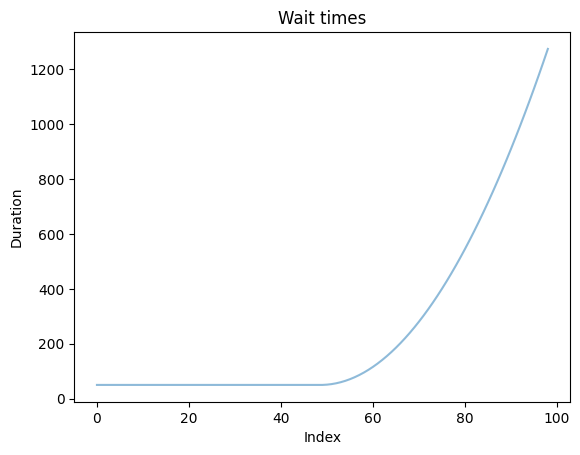

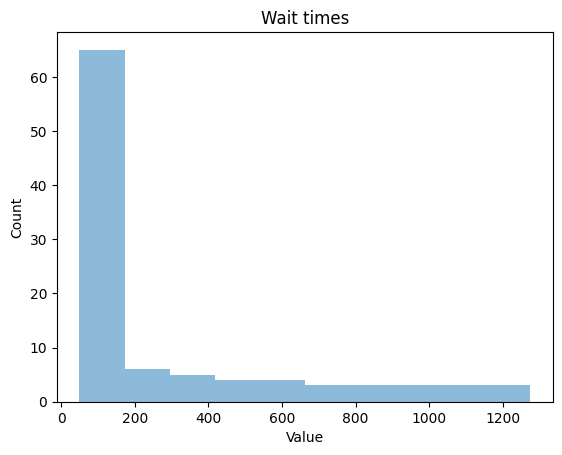

In [5]:
plt.title("Wait times")
plt.xlabel("Index")
plt.ylabel("Duration")
plt.plot(queue.wait_times, alpha=0.5)
plt.show()

plt.title("Wait times")
plt.xlabel("Value")
plt.ylabel("Count")
plt.hist(queue.wait_times, alpha=0.5)
plt.show()

# Utilization

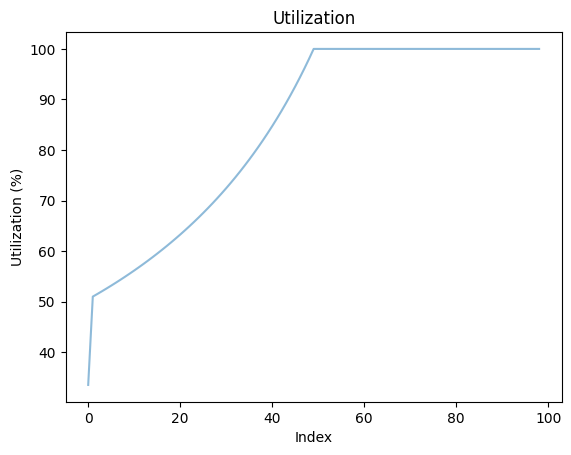

[0.33557047 0.51020408 0.51546392 0.52083333 0.52631579 0.53191489
 0.53763441 0.54347826 0.54945055 0.55555556 0.56179775 0.56818182
 0.57471264 0.58139535 0.58823529 0.5952381  0.60240964 0.6097561
 0.61728395 0.625     ]


In [6]:
plt.title("Utilization")
plt.xlabel("Index")
plt.ylabel("Utilization (%)")
plt.plot(queue.utilization() * 100, alpha=0.5)
plt.show()

print(queue.utilization()[:20])

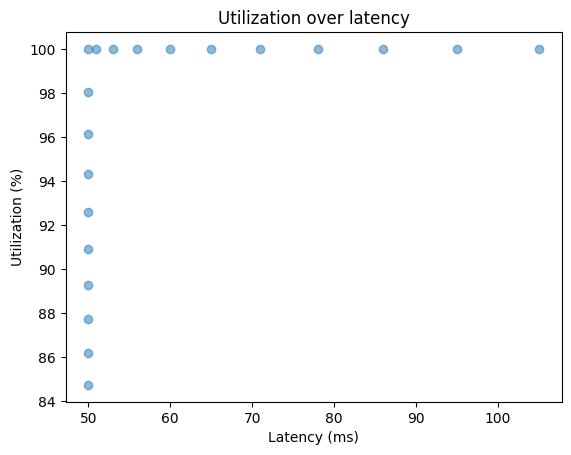

[33.55704698 51.02040816 51.54639175 52.08333333 52.63157895 53.19148936
 53.76344086 54.34782609 54.94505495 55.55555556]
[50 50 50 50 50 50 50 50 50 50]


In [7]:
plt.title("Utilization over latency")
plt.xlabel("Latency (ms)")
plt.ylabel("Utilization (%)")
plt.scatter(queue.wait_times[40:60], (queue.utilization(0) * 100)[40:60], alpha=0.5)
plt.show()

print((queue.utilization(0) * 100)[:10])
print(queue.wait_times[:10])